In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#non runnare se non avete installato plotly e cufflinks
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df= pd.read_csv('words_glasgow.csv')

## Data understanding

In [4]:
df

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,zeppelin,8,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,0,3192943.0
4678,zero,4,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,0,30735412.0
4679,zest,4,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,0,655010.0
4680,zoo,3,5.909,6.235,5.485,6.118,6.441,5.655,2.324,4.844,4.059,0,11589578.0


In [5]:
df["polysemy"].value_counts()

0    4303
1     379
Name: polysemy, dtype: int64

#### Missing values

In [5]:
df.isna().any()

word               False
length             False
arousal            False
valence            False
dominance          False
concreteness       False
imageability       False
familiarity        False
aoa                False
semsize            False
gender             False
polysemy           False
web_corpus_freq     True
dtype: bool

In [6]:
df.isnull().sum()

word                0
length              0
arousal             0
valence             0
dominance           0
concreteness        0
imageability        0
familiarity         0
aoa                 0
semsize             0
gender              0
polysemy            0
web_corpus_freq    14
dtype: int64

L'unica variabile che ha valori nulli è l'ultima, la quale rappresenta la frequenza della parola in considerazione nel 'Google Newspapers Corpus'. Possiamo dunque immaginare che le parole con valore nullo semplicemente non siano attestate nel corpus, quindi possiamo sostituire il valore nullo con 0.

Inoltre possiamo già notare che ci sono solo 14 parole che non trovano attestazione nel corpus

In [7]:
df = df.fillna(0)

In [8]:
df.isna().any()

word               False
length             False
arousal            False
valence            False
dominance          False
concreteness       False
imageability       False
familiarity        False
aoa                False
semsize            False
gender             False
polysemy           False
web_corpus_freq    False
dtype: bool

#### Correlation

In [9]:
df.corr() #per ora solo con Pearson, ragioniamo insieme se usare anche altro

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
length,1.000000,0.158401,0.035209,0.005979,-0.199510,-0.204197,-0.118623,0.400869,0.310469,0.003397,-0.231101,-0.156685
arousal,0.158401,1.000000,0.326418,0.362653,-0.248671,-0.084990,0.180115,-0.005560,0.512953,-0.130571,-0.086200,-0.010584
valence,0.035209,0.326418,1.000000,0.723138,0.056234,0.092339,0.244815,-0.189220,0.066223,-0.397254,0.020664,0.135801
dominance,0.005979,0.362653,0.723138,1.000000,0.036157,0.068979,0.193922,-0.130277,0.085684,-0.077673,0.052000,0.102720
concreteness,-0.199510,-0.248671,0.056234,0.036157,1.000000,0.909305,0.094330,-0.381269,-0.406168,0.116861,0.113538,-0.038217
imageability,-0.204197,-0.084990,0.092339,0.068979,0.909305,1.000000,0.214810,-0.494037,-0.328131,0.042241,0.104248,-0.056760
familiarity,-0.118623,0.180115,0.244815,0.193922,0.094330,0.214810,1.000000,-0.672021,0.033043,-0.177483,0.105702,0.276921
aoa,0.400869,-0.005560,-0.189220,-0.130277,-0.381269,-0.494037,-0.672021,1.000000,0.232247,0.133803,-0.178988,-0.226803
semsize,0.310469,0.512953,0.066223,0.085684,-0.406168,-0.328131,0.033043,0.232247,1.000000,0.159873,-0.132842,0.080099
gender,0.003397,-0.130571,-0.397254,-0.077673,0.116861,0.042241,-0.177483,0.133803,0.159873,1.000000,0.024727,-0.035874


Text(0.5, 1.0, 'correletion heatmap')

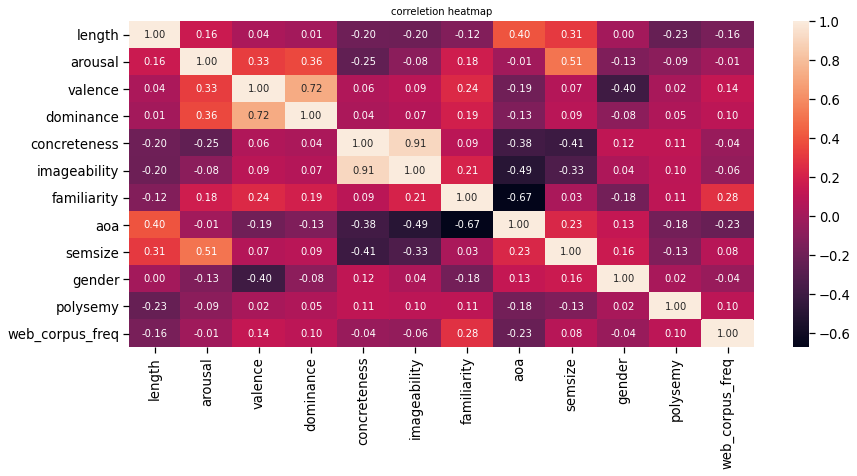

In [10]:
plt.rcParams["figure.figsize"]=[14,6]
sns.set_context("notebook", font_scale=1.2, rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":8})
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("correletion heatmap")

In [11]:
d = [df['dominance'],df['valence'],df['arousal']]
emotional = pd.DataFrame(d).transpose()
emotional

,dominance,valence,arousal
0,4.333,2.864,4.200
1,4.667,5.781,3.125
2,5.235,5.250,3.273
3,4.419,3.767,4.194
4,4.800,3.880,3.846
...,...,...,...
4677,5.333,5.000,6.185
4678,4.567,4.182,4.031
4679,6.121,6.818,5.969
4680,5.485,6.235,5.909


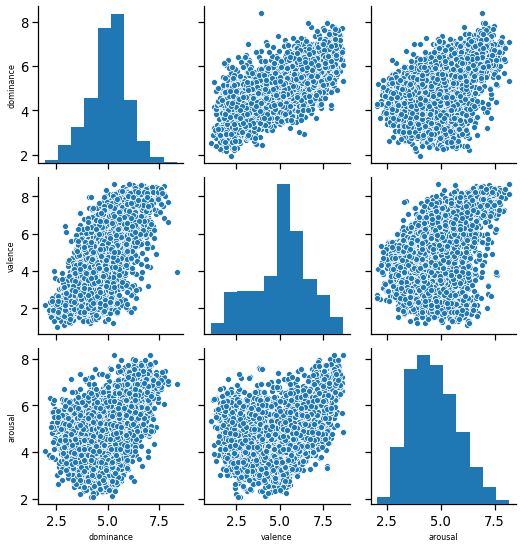

In [12]:
sns.pairplot(emotional)

In [13]:
d1 = [df['concreteness'],df['imageability'],df['familiarity'], df['aoa']]
personal = pd.DataFrame(d1).transpose()
personal

,concreteness,imageability,familiarity,aoa
0,5.455,4.391,2.382,6.760
1,5.906,5.344,3.324,5.177
2,3.286,3.177,5.121,5.543
3,3.367,2.516,3.971,6.233
4,3.292,2.571,3.097,6.407
...,...,...,...,...
4677,6.286,6.185,3.167,6.036
4678,2.688,3.903,6.269,2.636
4679,4.438,4.033,4.000,5.364
4680,6.118,6.441,5.655,2.324


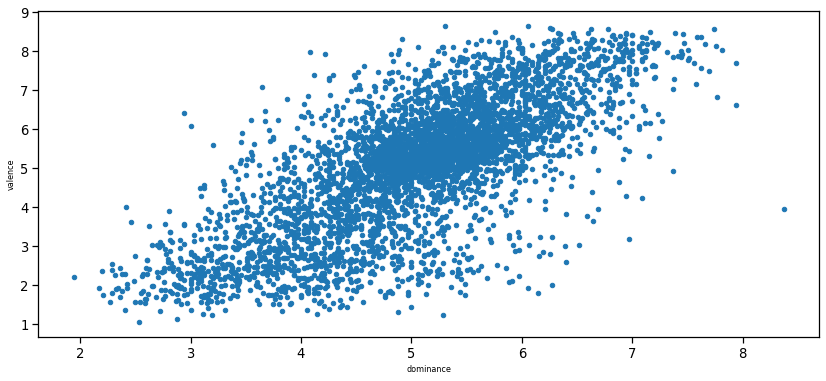

In [14]:
df.plot.scatter(x = 'dominance', y = 'valence')

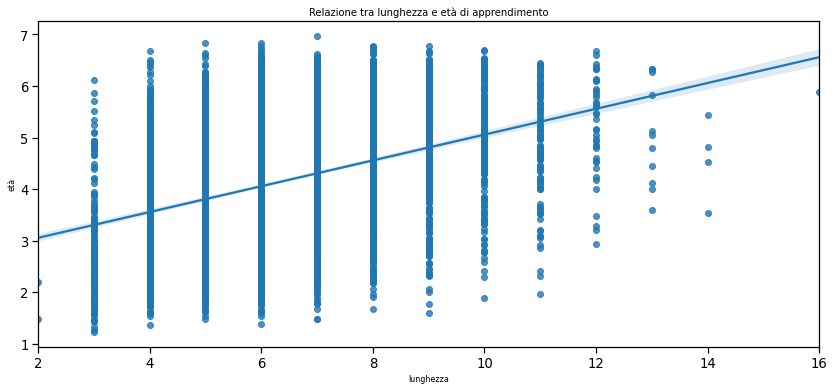

In [15]:
# Questo forse non ha tutto sto senso
d = [df['length'], df['aoa']]
df2 = pd.DataFrame(d).transpose()
sns.regplot(x="length", y="aoa", fit_reg=True, data=df2)
plt.title("Relazione tra lunghezza e età di apprendimento")
plt.xlabel("lunghezza")
plt.ylabel("età")
plt.show()

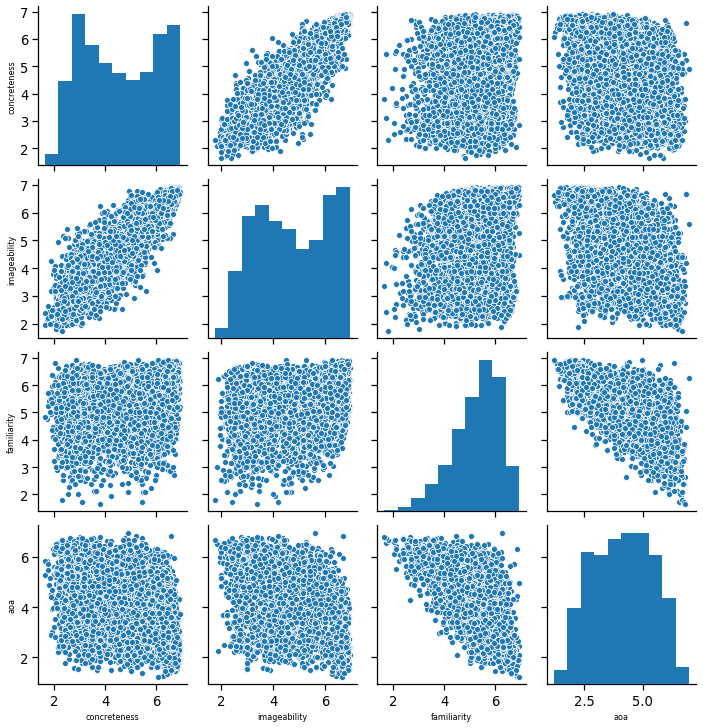

In [16]:
sns.pairplot(personal)

#### Statistics

In [17]:
df.describe().round(2)

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
count,4682.00,4682.00,4682.00,4682.00,4682.00,4682.00,4682.00,4682.00,4682.00,4682.00,4682.00,4.682000e+03
mean,6.35,4.68,5.09,5.04,4.57,4.72,5.27,4.14,4.14,4.10,0.08,2.980038e+07
std,2.01,1.10,1.59,0.93,1.43,1.36,0.92,1.25,1.02,0.91,0.27,8.479010e+07
min,2.00,2.06,1.03,1.94,1.64,1.74,1.65,1.22,1.38,1.00,0.00,0.000000e+00
25%,5.00,3.85,4.12,4.53,3.24,3.52,4.71,3.11,3.44,3.61,0.00,1.651678e+06
50%,6.00,4.57,5.29,5.12,4.47,4.68,5.44,4.18,4.19,4.12,0.00,5.682103e+06
75%,8.00,5.42,6.09,5.60,5.97,6.03,5.97,5.15,4.88,4.66,0.00,2.230461e+07
max,16.00,8.18,8.65,8.37,6.94,6.94,6.94,6.97,6.91,6.97,1.00,2.022460e+09


### Data Understanding

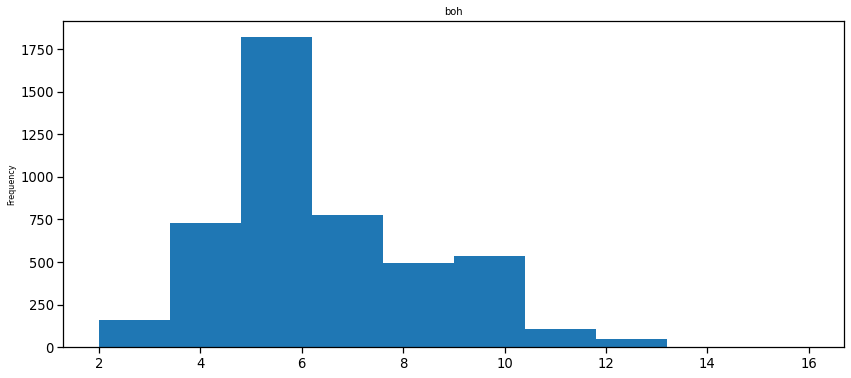

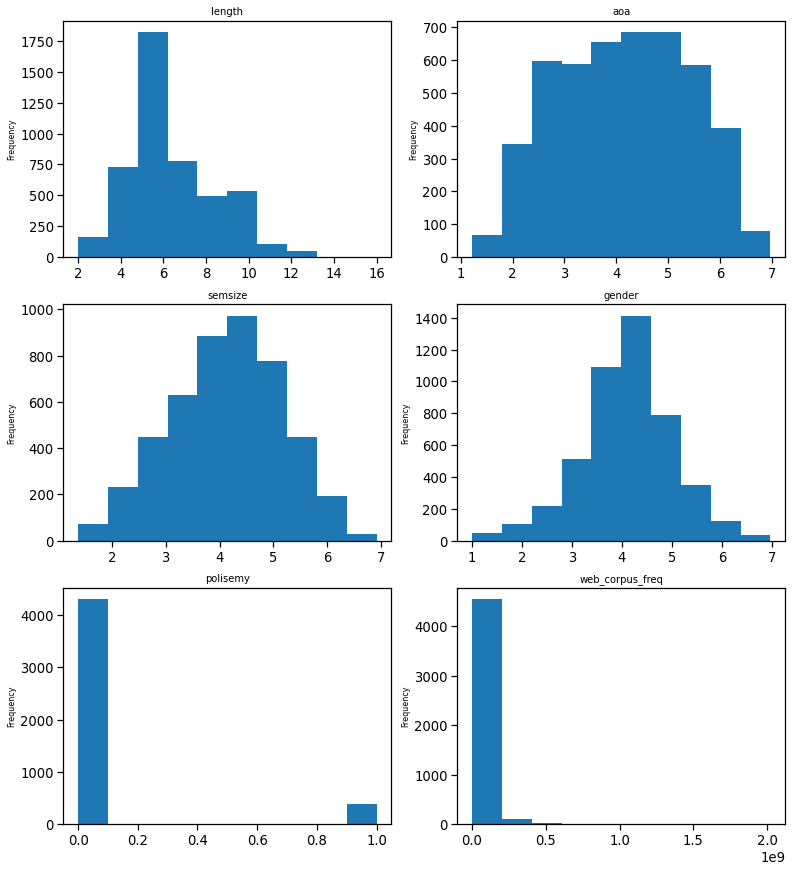

In [18]:
#Istogrammi di tutti gli attributi numerici

df_no_str = df.drop(columns=["word","web_corpus_freq"])

df[str(df.columns[1])].plot.hist(title = "boh")

fig = plt.figure(figsize=(20, 20), edgecolor = "black") 
fig_dims = (4, 3)

plt.subplot2grid(fig_dims, (0, 0))
df["length"].plot.hist(title = "length")
    
plt.subplot2grid(fig_dims, (0, 1))
df["aoa"].plot.hist(title = "aoa")

plt.subplot2grid(fig_dims, (1, 0))
df["semsize"].plot.hist(title = "semsize")

plt.subplot2grid(fig_dims, (1, 1))
df["gender"].plot.hist(title = "gender")

plt.subplot2grid(fig_dims, (2, 0))
df["polysemy"].plot.hist(title = "polisemy")

plt.subplot2grid(fig_dims, (2, 1))
df["web_corpus_freq"].plot.hist(title = "web_corpus_freq")

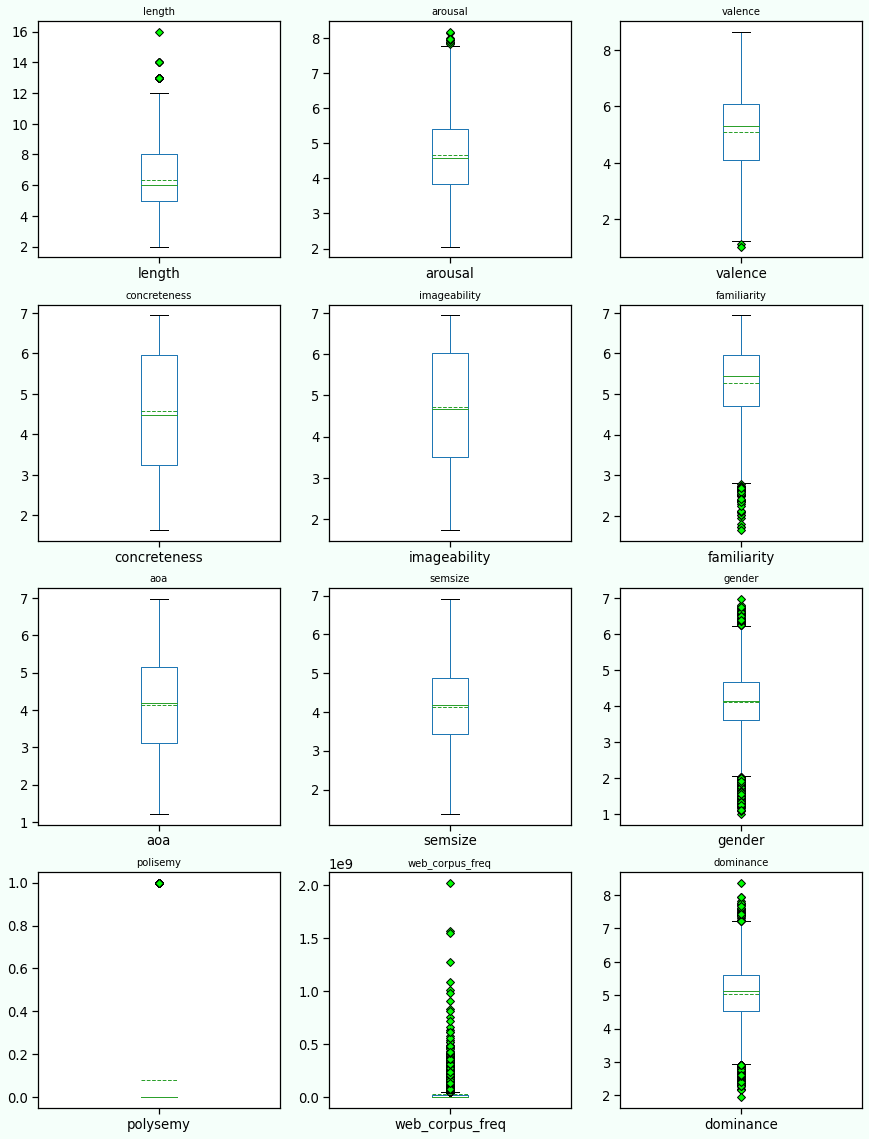

In [19]:
#Istogrammi di tutti gli attributi numerici

df_no_str = df.drop(columns=["word","web_corpus_freq"])
green_diamond = dict(markerfacecolor='lime', marker='D')

fig = plt.figure(figsize=(20, 20), edgecolor = "black",facecolor='mintcream') 
fig_dims = (4, 4)

plt.subplot2grid(fig_dims, (0, 0))
df["length"].plot.box(title = "length",showmeans = True, meanline = True,flierprops=green_diamond)
    
plt.subplot2grid(fig_dims, (0, 1))
df["arousal"].plot.box(title = "arousal",showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (0, 2))
df["valence"].plot.box(title = "valence",showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (1, 0))
df["concreteness"].plot.box(title = "concreteness",showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (1, 1))
df["imageability"].plot.box(title = "imageability",showmeans = True, meanline = True,flierprops=green_diamond)


plt.subplot2grid(fig_dims, (1, 2))
df["familiarity"].plot.box(title = "familiarity",showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (2, 0))
df["aoa"].plot.box(title = "aoa",showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (2, 1))
df["semsize"].plot.box(title = "semsize",showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (2, 2))
df["gender"].plot.box(title = "gender",showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (3, 0))
df["polysemy"].plot.box(title = "polisemy",showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (3, 1))
df["web_corpus_freq"].plot.box(title = "web_corpus_freq",showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (3, 2))
df["dominance"].plot.box(title = "dominance",showmeans = True, meanline = True,flierprops=green_diamond)

plt.savefig('boxplot.png')

In [20]:
valence = df['valence'].astype(int)
valence

0       2
1       5
2       5
3       3
4       3
       ..
4677    5
4678    4
4679    6
4680    6
4681    5
Name: valence, Length: 4682, dtype: int32

In [21]:
dominance = df['dominance'].astype(int)

In [22]:
p1 =pd.crosstab(dominance,valence)#.apply(lambda row: row/row.sum(),axis=1).reset_index()
p1

valence,1,2,3,4,5,6,7,8
dominance,,,,,,,,
1,0,1,0,0,0,0,0,0
2,42,49,16,1,0,1,0,0
3,65,214,133,69,32,7,1,0
4,48,163,240,363,428,106,33,2
5,6,63,66,241,1017,446,165,21
6,2,5,11,19,93,183,189,61
7,0,0,0,2,2,12,33,30
8,0,0,1,0,0,0,0,0


In [23]:
def percentuale(x):
    p1[x]=((p1[x]/p1[x].sum())*100).round(2)
    return p1[x]
for n in range (1,9):
    percentuale(n)
p1

valence,1,2,3,4,5,6,7,8
dominance,,,,,,,,
1,0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.00
2,25.77,9.90,3.43,0.14,0.00,0.13,0.00,0.00
3,39.88,43.23,28.48,9.93,2.04,0.93,0.24,0.00
4,29.45,32.93,51.39,52.23,27.23,14.04,7.84,1.75
5,3.68,12.73,14.13,34.68,64.69,59.07,39.19,18.42
6,1.23,1.01,2.36,2.73,5.92,24.24,44.89,53.51
7,0.00,0.00,0.00,0.29,0.13,1.59,7.84,26.32
8,0.00,0.00,0.21,0.00,0.00,0.00,0.00,0.00


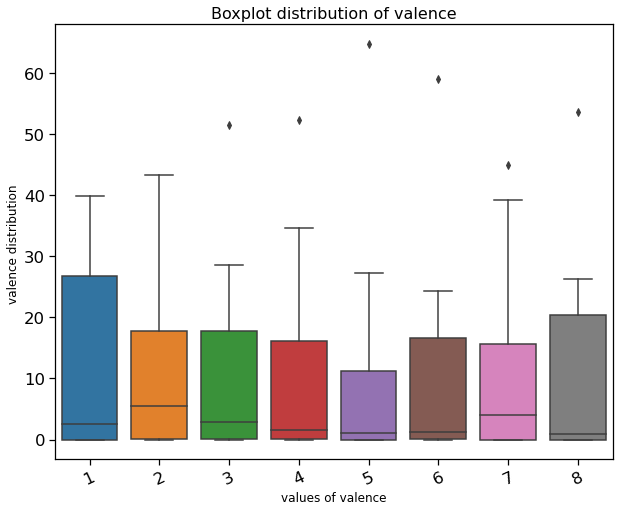

In [24]:
plt.figure(figsize=(10,8))
sns.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":12})
sns.boxplot(data=p1)
plt.title("Boxplot distribution of valence")
plt.xlabel("values of valence")
plt.ylabel("valence distribution ")
plt.xticks(rotation=25)
#plt.savefig('valence.png', dpi=1200)
plt.show()

In [25]:
p1.iplot()

In [26]:
p2 =pd.crosstab(dominance, valence)
def percentuale(x):
    p2[x]=((p2[x]/p2[x].sum())*100).round(2)
    return p2[x]
for n in range (1,9):
    percentuale(n)
p2

valence,1,2,3,4,5,6,7,8
dominance,,,,,,,,
1,0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.00
2,25.77,9.90,3.43,0.14,0.00,0.13,0.00,0.00
3,39.88,43.23,28.48,9.93,2.04,0.93,0.24,0.00
4,29.45,32.93,51.39,52.23,27.23,14.04,7.84,1.75
5,3.68,12.73,14.13,34.68,64.69,59.07,39.19,18.42
6,1.23,1.01,2.36,2.73,5.92,24.24,44.89,53.51
7,0.00,0.00,0.00,0.29,0.13,1.59,7.84,26.32
8,0.00,0.00,0.21,0.00,0.00,0.00,0.00,0.00


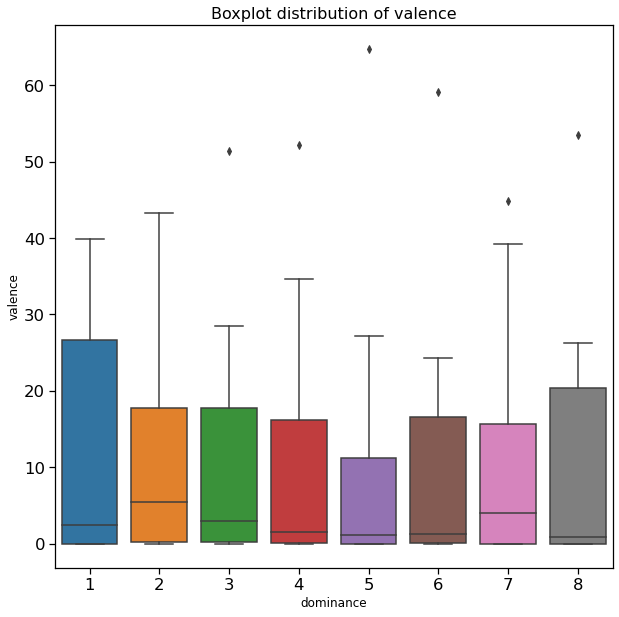

In [27]:
plt.figure(figsize=(10,10))
sns.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":12})
sns.boxplot(data=p2)
plt.title("Boxplot distribution of valence")
plt.xlabel("dominance")
plt.ylabel("valence")
#plt.xticks(rotation=25)
#plt.savefig('boxplot_valence.png', dpi=1200)
plt.show()

In [28]:
p2.iplot(kind='box',xTitle = 'dominance', yTitle = 'valence', title= 'Distribution of valence in %')

In [29]:
c = [df["aoa"].astype(int), df['length']]
c = pd.DataFrame(c).transpose()
c.iplot(kind='box')

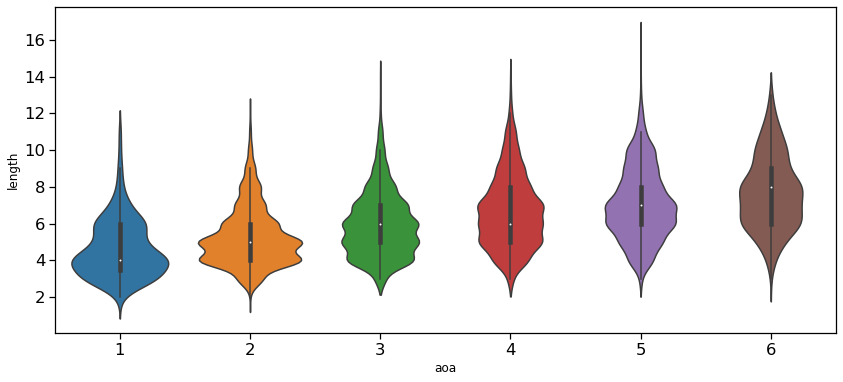

In [30]:
sns.violinplot(c['aoa'],c['length'])

In [31]:
c1 = pd.crosstab(c['length'],c['aoa'])
c1

aoa,1,2,3,4,5,6
length,,,,,,
2,1,1,0,0,0,0
3,36,62,32,19,7,1
4,48,260,212,125,78,9
5,20,262,240,228,134,28
6,26,139,238,221,219,67
7,9,76,172,237,225,58
8,3,54,95,138,133,69
9,2,26,48,100,105,35
10,1,10,26,58,91,35


In [32]:
c1.describe()

aoa,1,2,3,4,5,6
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,10.500000,63.928571,77.285714,84.428571,74.357143,23.928571
std,15.761443,92.685958,95.428127,90.808941,80.082272,25.487446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,1.000000,1.500000,6.000000,4.000000,1.500000
50%,1.500000,18.000000,29.000000,48.000000,54.000000,15.000000
75%,17.250000,72.500000,152.750000,134.750000,126.000000,35.000000
max,48.000000,262.000000,240.000000,237.000000,225.000000,69.000000


In [33]:
c1.iplot(kind='bar',xTitle ='length',yTitle = 'number of words')

In [34]:
a = pd.crosstab(df['imageability'].astype(int),df['aoa'].astype(int))
a

aoa,1,2,3,4,5,6
imageability,,,,,,
1,0,1,0,1,3,5
2,3,33,63,119,208,107
3,13,106,200,355,347,119
4,13,137,199,257,251,68
5,15,146,218,246,184,29
6,103,472,402,204,48,7


In [35]:
a.iplot(kind='bar',xTitle= 'imageability',yTitle= 'number of words',legend ='aoa')

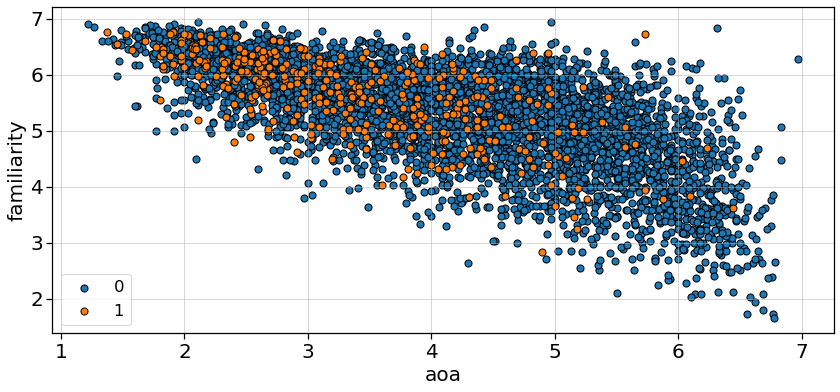

In [36]:
vals = list(df['polysemy'].unique())
x = 'aoa'
y = 'familiarity'

for val in vals:
    df_val = df[df['polysemy']==val]
    plt.scatter(df_val[x], df_val[y], s=50, edgecolor='black', label=val)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(x, fontsize=20)
plt.ylabel(y, fontsize=20)

plt.grid(alpha=0.5)
plt.legend(loc='best')
plt.show()


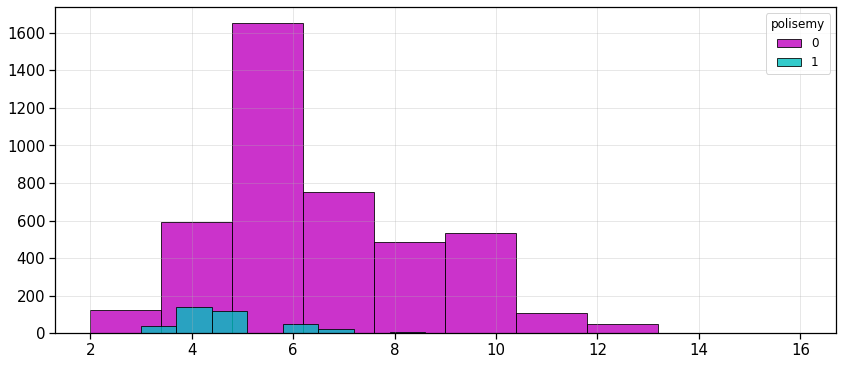

In [37]:
# qui invece un istogramma di length suddividendo per colori le parole polisemiche o meno (viola non polisemiche e verde acqua polisemiche), ad esempio sempre dal grafico si potrebbe
# notare che le parole polisemiche sono maggiormente presenti nelle parole con lunghezza 4-5 (non so se potrebbe essere utile ma condivido lo stesso)

vals = list(df['polysemy'].unique())
colors = ['m', 'c']
for i, val in enumerate(vals):
    plt.hist( df[ df['polysemy']==val ]['length'], color= colors[i],
             edgecolor='black', label=val, alpha=0.8)
    
plt.legend(loc='best',title = 'polisemy',fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(alpha=0.3)
plt.show()

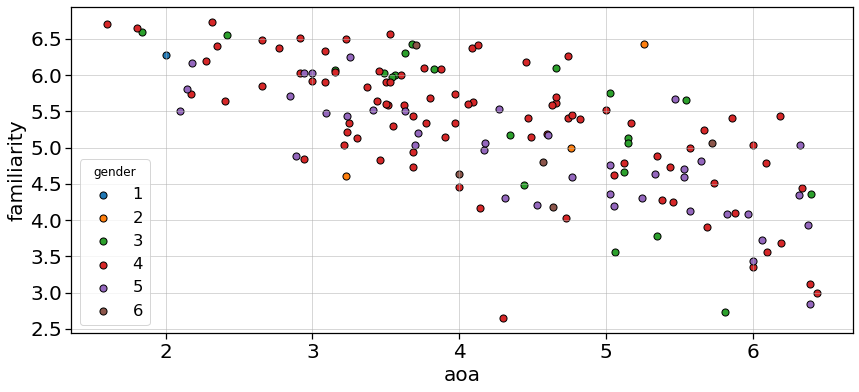

In [38]:
vals = list((df['gender'].sort_values().astype(int)).unique())
x = 'aoa'
y = 'familiarity'
z = 'gender'
#colors =['azure','lightcyan','palettorqoise','skyblue','lightskyblue','steelblue']

#for i, val in enumerate(vals):
for val in vals:
    df_val = df[df['gender']==val]
    plt.scatter(df_val[x], df_val[y],s=50,edgecolor='black', label=val)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(x, fontsize=20)
plt.ylabel(y, fontsize=20)


plt.grid(alpha=0.5)
plt.legend(loc='best', title = 'gender')
plt.show()


In [39]:
l= df.sort_values('web_corpus_freq', ascending = False,ignore_index= True )
l.fillna(0)

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,all,3,3.625,5.469,5.419,3.313,2.969,6.645,1.807,5.839,4.000,0,2.022460e+09
1,have,4,4.438,6.059,6.455,3.500,2.971,6.382,1.600,4.059,3.824,0,1.564203e+09
2,new,3,6.031,7.063,5.710,4.219,4.313,6.484,2.125,4.133,3.667,0,1.551259e+09
3,home,4,5.129,7.333,6.375,4.571,5.484,6.750,1.875,4.818,2.567,0,1.276852e+09
4,page,4,3.633,5.516,5.375,6.357,6.448,6.414,2.636,2.281,3.897,1,1.082122e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,TV,2,4.824,5.706,4.559,6.677,6.857,6.706,2.206,3.333,4.629,0,0.000000e+00
4678,Mum,3,4.594,7.938,4.219,6.091,6.625,6.906,1.219,5.061,1.212,0,0.000000e+00
4679,Twitter,7,4.235,4.943,4.824,4.886,5.600,6.273,6.971,4.771,3.829,0,0.000000e+00
4680,Mummy,5,5.364,7.471,4.879,5.794,6.515,6.182,1.771,4.677,1.455,0,0.000000e+00


In [40]:
l['web_corpus_freq'].iplot(kind='bar',title = 'Distribution of the words in the corpus, ranked by frequency',colors = '#8A2BE2',xTitle='rank', yTitle='frequency')

In [41]:
l.index = np.log(l.index)
l.web_corpus_freq = np.log(l.web_corpus_freq)

<ipython-input-41-8c73617330eb>:1: RuntimeWarning:

divide by zero encountered in log

C:\Users\daddu\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning:

divide by zero encountered in log



In [42]:
l = l[['web_corpus_freq']]
l

,web_corpus_freq
-inf,21.427580
0.000000,21.170642
0.693147,21.162332
1.098612,20.967664
1.386294,20.802190
...,...
8.450412,-inf
8.450626,-inf
8.450840,-inf
8.451053,-inf


In [43]:
l.iplot(kind = 'bar',title = 'Distribution of the words in the corpus, ranked by frequency, double log scale',xTitle='log(rank)', yTitle='log(frequency)')

In [74]:
df.drop('word', inplace= True, axis =1)

In [76]:
df

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
1,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4677,8,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,0,3192943.0
4678,4,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,0,30735412.0
4679,4,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,0,655010.0
4680,3,5.909,6.235,5.485,6.118,6.441,5.655,2.324,4.844,4.059,0,11589578.0


In [84]:
df2 =np.log(df)

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

In [86]:
df2

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,2.079442,1.435085,1.052219,1.466260,1.696533,1.479557,0.867940,1.911023,1.537297,1.684731,-inf,11.983391
1,1.609438,1.139434,1.754577,1.540516,1.775969,1.675974,1.201169,1.644226,1.633350,1.194831,-inf,15.256498
2,2.302585,1.185707,1.658228,1.655367,1.189671,1.155937,1.633350,1.712536,0.980954,1.379018,-inf,11.850147
3,2.079442,1.433655,1.326279,1.485913,1.214022,0.922670,1.379018,1.829858,1.543084,1.642292,-inf,11.729028
4,2.302585,1.347034,1.355835,1.568616,1.191495,0.944295,1.130434,1.857391,1.625902,1.519732,-inf,11.760902
...,...,...,...,...,...,...,...,...,...,...,...,...
4677,2.079442,1.822127,1.609438,1.673914,1.838325,1.822127,1.152785,1.797742,1.698181,1.661841,-inf,14.976454
4678,1.386294,1.394014,1.430790,1.518857,0.988797,1.361745,1.835617,0.969263,0.564177,1.428396,-inf,17.240926
4679,1.386294,1.786579,1.919566,1.811725,1.490204,1.394511,1.386294,1.679710,0.969263,1.238954,-inf,13.392406
4680,1.098612,1.776477,1.830179,1.702017,1.811235,1.862684,1.732540,0.843290,1.577741,1.400937,-inf,16.265617


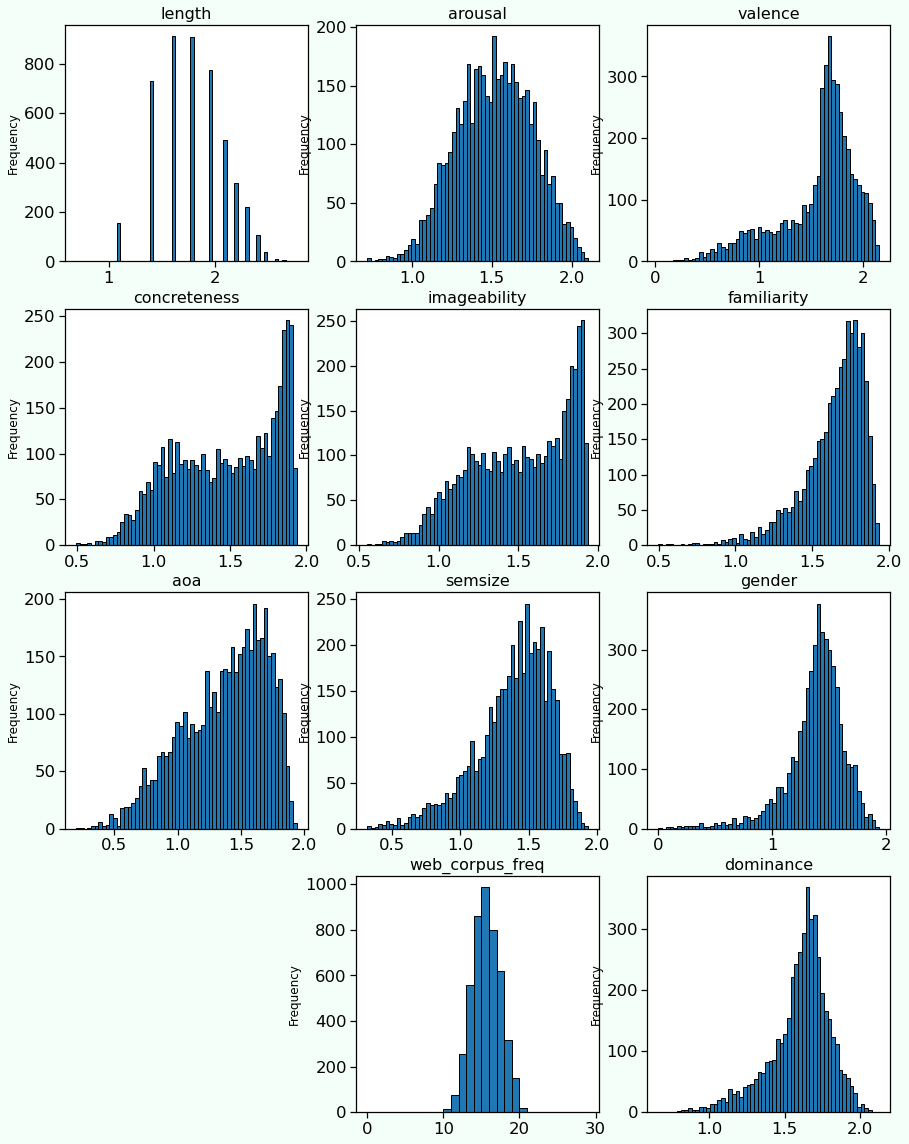

In [79]:
#Istogrammi di tutti gli attributi numerici

#df_no_str = df.drop(columns=["word","web_corpus_freq"])
#green_diamond = dict(markerfacecolor='lime', marker='D')

fig = plt.figure(figsize=(20, 20), edgecolor = "black",facecolor='mintcream') 
fig_dims = (4, 4)

plt.subplot2grid(fig_dims, (0, 0))
df2["length"].plot.hist(title = "length", edgecolor = "black", bins = 60 )
    
plt.subplot2grid(fig_dims, (0, 1))
df2["arousal"].plot.hist(title = "arousal", edgecolor = "black", bins = 60)

plt.subplot2grid(fig_dims, (0, 2))
df2["valence"].plot.hist(title = "valence", edgecolor = "black", bins = 60)

plt.subplot2grid(fig_dims, (1, 0))
df2["concreteness"].plot.hist(title = "concreteness", edgecolor = "black", bins = 60)

plt.subplot2grid(fig_dims, (1, 1))
df2["imageability"].plot.hist(title = "imageability", edgecolor = "black", bins = 60)


plt.subplot2grid(fig_dims, (1, 2))
df2["familiarity"].plot.hist(title = "familiarity", edgecolor = "black", bins = 60)

plt.subplot2grid(fig_dims, (2, 0))
df2["aoa"].plot.hist(title = "aoa", edgecolor = "black", bins = 60)

plt.subplot2grid(fig_dims, (2, 1))
df2["semsize"].plot.hist(title = "semsize", edgecolor = "black", bins = 60)

plt.subplot2grid(fig_dims, (2, 2))
df2["gender"].plot.hist(title = "gender", edgecolor = "black", bins = 60)

#plt.subplot2grid(fig_dims, (3, 0))
#df2["polysemy"].plot.hist(title = "polisemy", edgecolor = "black", bins = 60)

plt.subplot2grid(fig_dims, (3, 1))
df2["web_corpus_freq"].plot.hist(title = "web_corpus_freq", edgecolor = "black", bins =np.arange(0,30))

plt.subplot2grid(fig_dims, (3, 2))
df2["dominance"].plot.hist(title = "dominance", edgecolor = "black", bins = 60)

plt.savefig('hist_log.png')

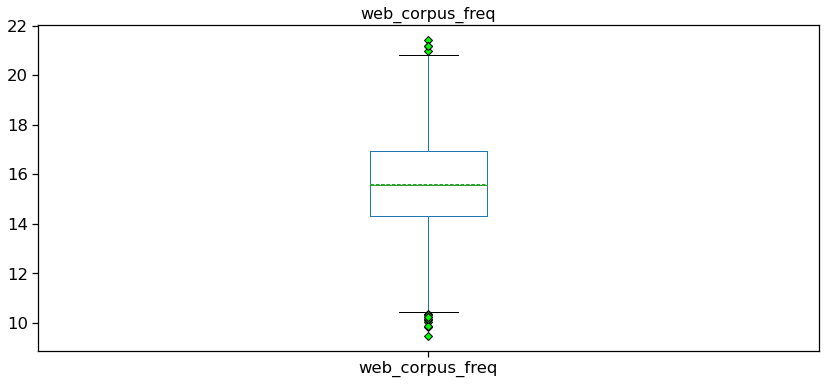

In [90]:
df2["web_corpus_freq"].plot.box(title = "web_corpus_freq",showmeans = True, meanline = True,flierprops=green_diamond)
plt.savefig('web_freq_boxplot.png')

### Ricerca di inconsistenze e di errori

In [81]:
df= pd.read_csv('words_glasgow.csv')
l=[]# lista che contiene la lunghezza effettiva delle parole
for i in df['word']:
    l.append(len(i))

In [82]:
#la rendo una serie e la confronto con la colonna delle lenghezze riporate nel dataset
serie = pd.Series(l)
serie.equals(df['length'])

True

#### Valutiamo i primi e ultimi 5 valori di ogni variabile, per comprendere se ci sono errorri

In [52]:
df2 = df[['word','gender']]
df2.sort_values('gender', ascending = False,ignore_index= True )

,word,gender
0,man,6.971
1,king,6.806
2,father,6.788
3,uncle,6.742
4,penis,6.714
...,...,...
4677,girly,1.114
4678,women,1.114
4679,Mom,1.097
4680,mother,1.088


In [53]:
df2 = df[['word','arousal']]
df2.sort_values('arousal', ascending = False,ignore_index= True )

,word,arousal
0,passionate,8.177
1,love,8.147
2,kiss,8.000
3,spectacular,7.970
4,aroused,7.943
...,...,...
4677,ironing,2.219
4678,boring,2.200
4679,dustbin,2.094
4680,sluggish,2.061


In [54]:
df2 = df[['word','dominance']]
df2.sort_values('dominance', ascending = False,ignore_index= True )

,word,dominance
0,dominate,8.371
1,powerful,7.938
2,independent,7.936
3,independence,7.813
4,leader,7.771
...,...,...
4677,slave,2.270
4678,depression,2.206
4679,fearful,2.194
4680,humiliated,2.171


In [55]:
df2 = df[['word','valence']]
df2.sort_values('valence', ascending = False,ignore_index= True )


,word,valence
0,love,8.647
1,peace,8.647
2,loving,8.600
3,trustworthy,8.581
4,happiness,8.571
...,...,...
4677,murderer,1.235
4678,racist,1.229
4679,cancer,1.219
4680,genocide,1.125


In [56]:
df2 = df[['word','familiarity']]
df2.sort_values('familiarity', ascending = False,ignore_index= True )


,word,familiarity
0,music,6.939
1,university,6.939
2,love,6.906
3,fridge,6.906
4,Mum,6.906
...,...,...
4677,edifice,1.938
4678,quiescent,1.794
4679,temerity,1.735
4680,belfry,1.735


In [57]:
df2 = df[['word','concreteness']]
df2.sort_values('concreteness', ascending = False,ignore_index= True )


,word,concreteness
0,bridge,6.938
1,volcano,6.931
2,giraffe,6.912
3,carrot,6.909
4,gorilla,6.906
...,...,...
4677,morality,1.767
4678,philosophy,1.758
4679,abstract,1.714
4680,immoral,1.647


In [58]:
df2 = df[['word','polysemy']]
df2.sort_values('polysemy', ascending = False,ignore_index= True )

,word,polysemy
0,like,1
1,board,1
2,count,1
3,counter,1
4,blubber,1
...,...,...
4677,fireworks,0
4678,firm,0
4679,first,0
4680,fish,0


In [59]:
df2 = df[['word','aoa']]
df2.sort_values('aoa', ascending = False,ignore_index= True )

,word,aoa
0,Twitter,6.971
1,cortex,6.833
2,dildo,6.829
3,dissident,6.786
4,zephyr,6.778
...,...,...
4677,yellow,1.382
4678,head,1.371
4679,Mom,1.333
4680,Dad,1.265


In [60]:
df2 = df[['word','semsize']]
df2.sort_values('semsize', ascending = False,ignore_index= True )

,word,semsize
0,universe,6.912
1,epidemic,6.788
2,galaxy,6.742
3,genocide,6.688
4,infinity,6.667
...,...,...
4677,caterpillar,1.484
4678,grain,1.441
4679,grasshopper,1.412
4680,flea,1.400


In [61]:
df2 = df[['word','imageability']]
df2.sort_values('imageability', ascending = False,ignore_index= True )

,word,imageability
0,carrot,6.941
1,bee,6.933
2,pencil,6.920
3,giraffe,6.914
4,daffodil,6.912
...,...,...
4677,elude,1.938
4678,misconception,1.929
4679,ever,1.875
4680,habituate,1.821


In [62]:
df2 = df[['word','web_corpus_freq']]
df2.sort_values('web_corpus_freq', ascending = False,ignore_index= True )

,word,web_corpus_freq
0,all,2.022460e+09
1,have,1.564203e+09
2,new,1.551259e+09
3,home,1.276852e+09
4,page,1.082122e+09
...,...,...
4677,skijump,NaN
4678,TRUE,NaN
4679,TV,NaN
4680,Twitter,NaN


In [70]:
df2 = df[['word','length']]
df2.sort_values('length', ascending = False,ignore_index= True )


,word,length
0,intercontinental,16
1,transportation,14
2,multiplication,14
3,slaughterhouse,14
4,responsibility,14
...,...,...
4677,ill,3
4678,pin,3
4679,job,3
4680,up,2


In [83]:
df3 = np.log(df)

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

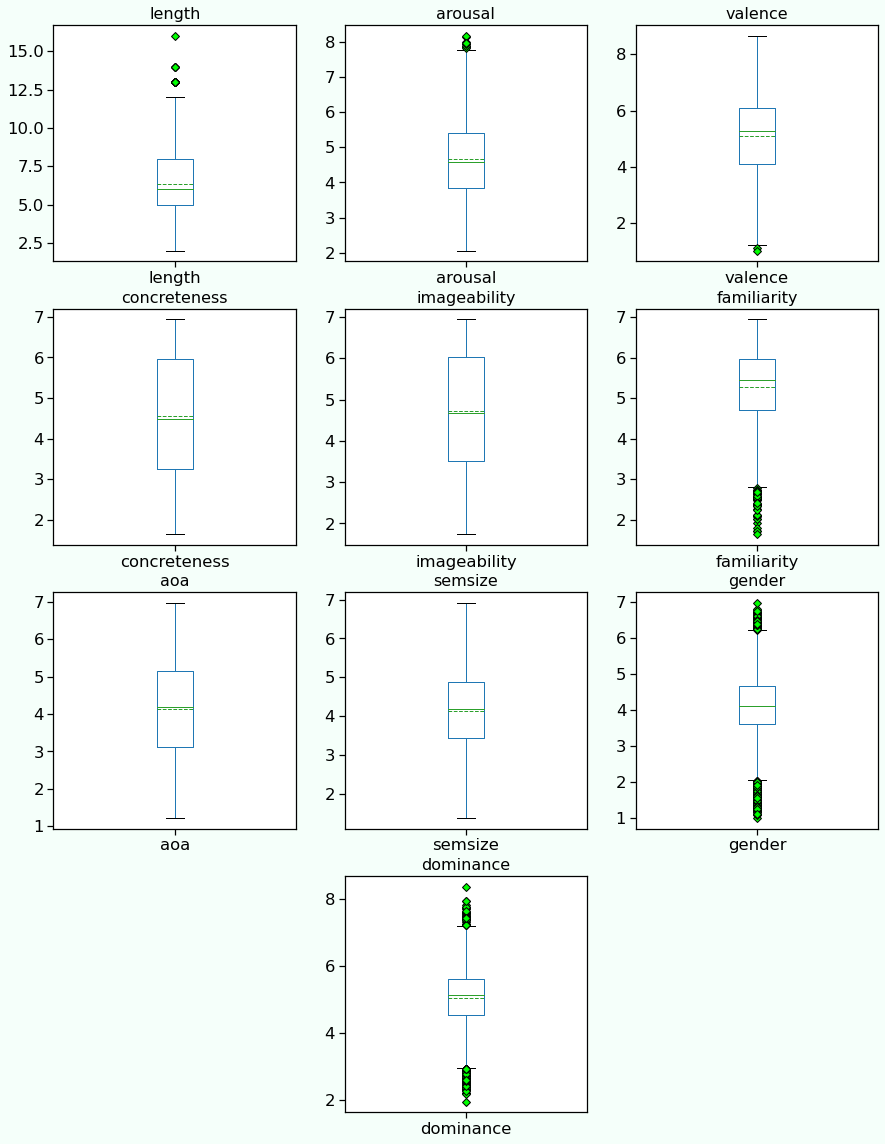

In [89]:
#Istogrammi di tutti gli attributi numerici

df_no_str = df.drop(columns=["word","web_corpus_freq"])
green_diamond = dict(markerfacecolor='lime', marker='D')

fig = plt.figure(figsize=(20, 20), edgecolor = "black",facecolor='mintcream') 
fig_dims = (4, 4)

plt.subplot2grid(fig_dims, (0, 0))
df["length"].plot.box(title = "length",showmeans = True, meanline = True,flierprops=green_diamond)
    
plt.subplot2grid(fig_dims, (0, 1))
df["arousal"].plot.box(title = "arousal",showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (0, 2))
df["valence"].plot.box(title = "valence",showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (1, 0))
df["concreteness"].plot.box(title = "concreteness",showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (1, 1))
df["imageability"].plot.box(title = "imageability",showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (1, 2))
df["familiarity"].plot.box(title = "familiarity",showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (2, 0))
df["aoa"].plot.box(title = "aoa",showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (2, 1))
df["semsize"].plot.box(title = "semsize",showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (2, 2))
df["gender"].plot.box(title = "gender",showmeans = True, meanline = True,flierprops=green_diamond)

plt.subplot2grid(fig_dims, (3, 1))
df["dominance"].plot.box(title = "dominance",showmeans = True, meanline = True,flierprops=green_diamond)

plt.savefig('boxplot.png')

In [92]:
df2

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,2.079442,1.435085,1.052219,1.466260,1.696533,1.479557,0.867940,1.911023,1.537297,1.684731,-inf,11.983391
1,1.609438,1.139434,1.754577,1.540516,1.775969,1.675974,1.201169,1.644226,1.633350,1.194831,-inf,15.256498
2,2.302585,1.185707,1.658228,1.655367,1.189671,1.155937,1.633350,1.712536,0.980954,1.379018,-inf,11.850147
3,2.079442,1.433655,1.326279,1.485913,1.214022,0.922670,1.379018,1.829858,1.543084,1.642292,-inf,11.729028
4,2.302585,1.347034,1.355835,1.568616,1.191495,0.944295,1.130434,1.857391,1.625902,1.519732,-inf,11.760902
...,...,...,...,...,...,...,...,...,...,...,...,...
4677,2.079442,1.822127,1.609438,1.673914,1.838325,1.822127,1.152785,1.797742,1.698181,1.661841,-inf,14.976454
4678,1.386294,1.394014,1.430790,1.518857,0.988797,1.361745,1.835617,0.969263,0.564177,1.428396,-inf,17.240926
4679,1.386294,1.786579,1.919566,1.811725,1.490204,1.394511,1.386294,1.679710,0.969263,1.238954,-inf,13.392406
4680,1.098612,1.776477,1.830179,1.702017,1.811235,1.862684,1.732540,0.843290,1.577741,1.400937,-inf,16.265617
